<p aling='center'>
  <img src="https://github.com/danilosl/Learning-CG/blob/main/img/UFPA.png?raw=true" alt="UFPA" width=100/>
  <img src="https://github.com/danilosl/Learning-CG/blob/main/img/ENGC.png?raw=true" alt="ENGC" width=100/>
  <p><b>SERVIÇO PÚBLICO FEDERAL<br>
  MINISTERIO DA EDUCAÇÃO<br>
  UNIVERSIDADE FEDERAL DO PARÁ<br>
  CAMPUS TUCURUÍ<br>
  ENGENHARIA DA COMPUTAÇÃO</b><br>
</p>

---
> <b>Disciplina</b>: Tópicos Especiais em Computadores I - Ciência de Dados<br>
> <b>Professor</b>: Dr. Adam Dreyton Ferreira dos Santos<br>
> <b>Aluno</b>: Danilo de Sousa Lopes<br>
> <b>Matrícula</b>: 201833840019<br>
> <b>Data</b>: 31/10/2022<br>
> <b>Projeto 3</b>: Técnicas Avançadas de Tratamento e Análise de Dados</br>

***
# <font color=green size=10>Tarefa 3 - Ciência de Dados</font>
***

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [156]:
from google.colab import drive
# montagem do drive
drive.mount('/content/drive')

# download dos datasets
!wget -q https://github.com/danilosl/Learning-DataScience/raw/main/Projeto3/Dataset/dados.csv

dados = pd.read_csv('/content/dados.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Visualize o conteúdo do DataFrame

In [157]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [158]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


***
***

# <font color=green> Parte 1 - Análise Descritiva de um Conjunto de Dados </font>

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

In [159]:
dados.Renda.min()

0

In [160]:
dados.Renda.max()

200000

### 1º Definir os intevalos das classes em reais (R$)

In [161]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [162]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [163]:
pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [164]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [165]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True),
    normalize = True
)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [166]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


In [167]:
dist_freq_quantitativas_personalizadas.rename_axis('Categoria', axis='columns', inplace=True)
dist_freq_quantitativas_personalizadas

Categoria,Frequência,Porcentagem (%)
E,49755,0.647514
D,18602,0.242087
C,7241,0.094235
B,822,0.010698
A,420,0.005466


In [168]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False, inplace=True)
dist_freq_quantitativas_personalizadas

Categoria,Frequência,Porcentagem (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

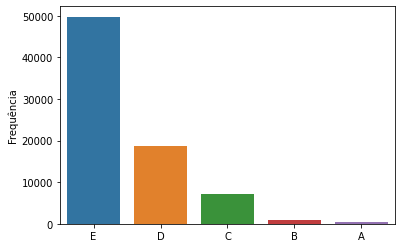

In [169]:
sns.barplot(x=dist_freq_quantitativas_personalizadas.index, y='Frequência', data=dist_freq_quantitativas_personalizadas)

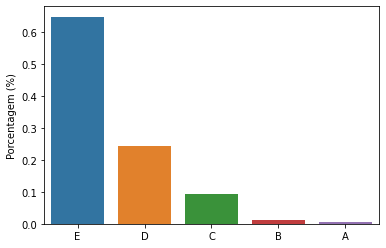

In [170]:
sns.barplot(x=dist_freq_quantitativas_personalizadas.index, y='Porcentagem (%)', data=dist_freq_quantitativas_personalizadas)

> ### Conclusões

A partir da análise gráfica e numérica dos resultados, pode-se perceber a grande discrepância em relação as classes de renda, o que demonstra a grande desigualdade social presente no país até os anos de 2015, cerca de 1% da população faziam parte das classes A e B, que possuem uma renda entre 15 e acima de 25 salários mínimos. Em contrapartida mais de 60% da população fazia parte da classe de renda E, que possuem uma renda de até 2 salários mínimos.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


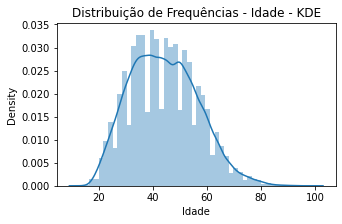

In [171]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(5, 3)
ax.set_title('Distribuição de Frequências - Idade - KDE', fontsize=12)
ax.set_xlabel('Idade', fontsize=10)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


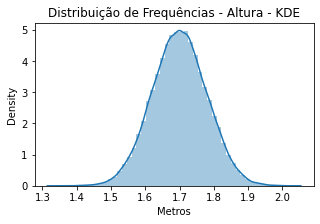

In [172]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(5, 3)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=12)
ax.set_xlabel('Metros', fontsize=10)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


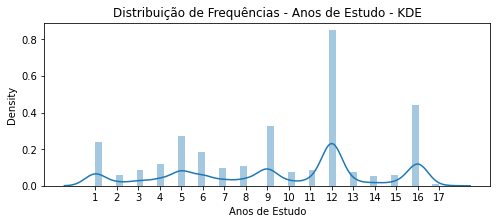

In [173]:
anos=list(dados['Anos de Estudo'].unique())
ax = sns.distplot(dados['Anos de Estudo'])
ax.figure.set_size_inches(8, 3)
ax.set_title('Distribuição de Frequências - Anos de Estudo - KDE', fontsize=12)
ax.set_xlabel('Anos de Estudo', fontsize=10)
ax.set_xticks(sorted(anos, key=int))
ax

> ### Conclusões

Gráfico - Distribuição de Frequências - Idade - KDE: a distribuição encontrada nesse gráfico nos remete a uma distribuição gaussiana, onde é possível inferir que a média dessa amostra contida no conjunto de dados apresenta idade igual a 40 anos.

Gráfico - Distribuição de Frequências - Altura - KDE: a distribuição encontrada nesse gráfico nos remete a uma distribuição gaussiana, onde é possível inferir que a média dessa amostra contida no conjunto de dados apresenta altura igual a 1,70m e um desvio padrão suave.

Gráfico - Distribuição de Frequências - Anos de Estudo - KDE: já este gráfico não representa uma curva gaussiana bem definida, pode-se destacar a ocorrência de várias curvas, onde infere-se a ausência de uma distribuição normalizada.


### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


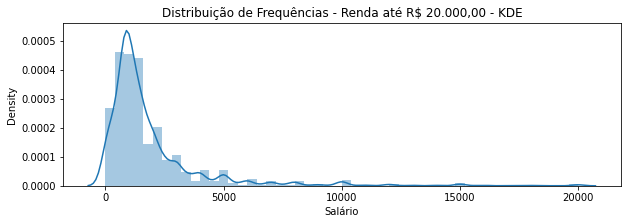

In [174]:
sel = dados['Renda']<=20000
new_dados = dados[sel]
ax = sns.distplot(new_dados.Renda)
ax.figure.set_size_inches(10, 3)
ax.set_title('Distribuição de Frequências - Renda até R$ 20.000,00 - KDE', fontsize=12)
ax.set_xlabel('Salário', fontsize=10)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [175]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

dados.Sexo = dados.Sexo.map(sexo)
dados.Cor = dados.Cor.map(cor)
dados['Anos de Estudo'] = dados['Anos de Estudo'].map(anos_de_estudo)
dados.UF = dados.UF.map(uf)

In [176]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


In [177]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [178]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> ### Conclusões

Através da tabela de frequências e de percentuais do cruzando das variáveis SEXO e COR, podemos inferir que a maioria das pessoas que participaram da pesquisa, fazem parte do sexo masculino, independente da cor. Outro ponto que vale destacar é que mais de 50% das pessoas que compõem essa amostra são da cor Parda e Branca.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [179]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [180]:
dados.Renda.median()

1200.0

In [181]:
dados.Renda.quantile()

1200.0

### Obtenha a moda

In [182]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [183]:
desvio_medio_absoluto = dados.Renda.mad()
desvio_medio_absoluto

1526.4951371638058

### Obtenha a variância

In [184]:
variancia = dados.Renda.var()
variancia

11044906.006217021

### Obtenha o desvio-padrão

In [185]:
desvio_padrao = dados.Renda.std()
desvio_padrao

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [186]:
tabela_mean_median_max = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = {'mean','median','max'},
                         values = dados.Renda)
tabela_mean_median_max.rename(index = sexo, inplace = True)
tabela_mean_median_max.rename(columns = cor, inplace = True)
tabela_mean_median_max

max                                                mean  \
Cor        Amarela    Branca  Indígena     Parda    Preta      Amarela   
Sexo                                                                     
Feminino   20000.0  100000.0  120000.0   30000.0  23000.0  3027.341880   
Masculino  50000.0  200000.0   10000.0  100000.0  50000.0  4758.251064   

                                                               median          \
Cor             Branca     Indígena        Parda        Preta Amarela  Branca   
Sexo                                                                            
Feminino   2109.866750  2464.386139  1176.758516  1134.596400  1500.0  1200.0   
Masculino  2925.744435  1081.710938  1659.577425  1603.861687  2800.0  1700.0   

                                    
Cor       Indígena   Parda   Preta  
Sexo                                
Feminino     788.0   800.0   800.0  
Masculino    797.5  1200.0  1200.0

> ### Conclusões

Através das informações obtidas é possível observar informações que são de suma importância para a análise do nosso banco de dados, por exemplo, a moda da coluna Renda é 788, justamente o valor do salário minímo no ano da pesquisa, dando a entender que boa parte da população análisada ganhar 1 salário minimo.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [187]:
tabela_mad_var_std = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = {'mad','var','std'},
                         values = dados.Renda)
tabela_mad_var_std.rename(index = sexo, inplace = True)
tabela_mad_var_std.rename(columns = cor, inplace = True)
tabela_mad_var_std

mad                                                     \
Cor            Amarela       Branca     Indígena        Parda       Preta   
Sexo                                                                        
Feminino   2549.146322  1670.967106  3007.892952   811.580946  705.453357   
Masculino  3709.597211  2261.012346   798.910889  1125.827704  975.602482   

                  std                                                       \
Cor           Amarela       Branca      Indígena        Parda        Preta   
Sexo                                                                         
Feminino   3731.17366  3251.013154  11957.498292  1596.233048  1349.799809   
Masculino  5740.82482  4750.791872   1204.093490  2312.087184  1936.309271   

                    var                                            \
Cor             Amarela        Branca      Indígena         Parda   
Sexo                                                                
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                         
Cor               Preta  
Sexo                     
Feminino   1.821960e+06  
Masculino  3.749294e+06

> ### Conclusões

Analisando os dados da dispersão por cor e sexo é possível ver que a dispersão no que se refere indigenas não é tão discrepante assim se comparada com pessoas de outras cores.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

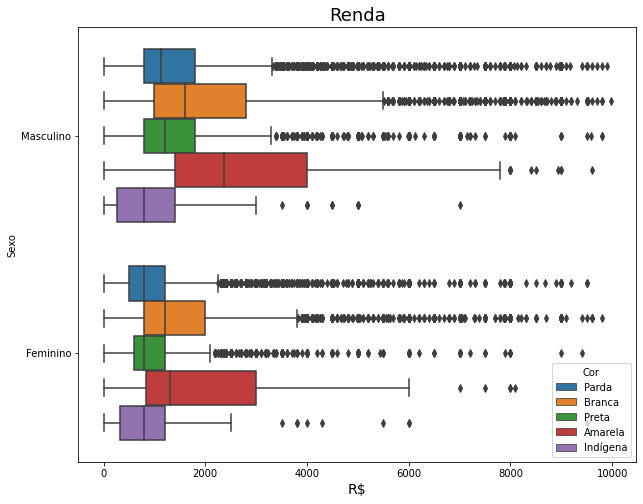

In [188]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', hue = 'Cor', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(10, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

O Gráfico de box plot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis sendo assim, é possível observar que quando se refere a cor Parda é menor se comparado ao de cor Amarela o Indígena e o a Parda são próximo porem o Indígena tem uma dispersão bem maior quando comparado a cor Parda.

## <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [189]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788.00)
print(f'O percentual de pessoas de nosso dataset que ganham um salário mínimo (R$ 788,00) ou menos eh de: {percentual:.2f}%')

O percentual de pessoas de nosso dataset que ganham um salário mínimo (R$ 788,00) ou menos eh de: 24.39%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [190]:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [191]:
dados.Renda.quantile(.99)

15000.0

O valor máximo ganho por 99% das pessoas de nosso dataset é R$ 15.000,00

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [192]:
tabela_mean_median_max_std = pd.crosstab(dados['Anos de Estudo'],
                         dados.Sexo,
                         aggfunc = {'mean','median','max','std'},
                         values = dados.Renda)
tabela_mean_median_max_std

max                   mean               \
Sexo                            Feminino Masculino     Feminino    Masculino   
Anos de Estudo                                                                 
1 ano                             2000.0   30000.0   492.771987   895.629047   
10 anos                           6000.0   45000.0   925.919225  1731.270847   
11 anos                         100000.0  200000.0  1286.790889  2117.060504   
12 anos                         120000.0   30000.0  1682.313725  2470.330776   
13 anos                          20000.0   25000.0  1911.730047  3195.099154   
14 anos                          20000.0   50000.0  2226.460457  3706.620269   
15 anos ou mais                 100000.0  200000.0  3899.513231  6134.279790   
2 anos                            4000.0   40000.0   529.911638   931.178986   
3 anos                            3500.0   80000.0   546.853916  1109.203862   
4 anos                           10000.0   50000.0   704.279111  1302.329283   
5 anos                            8000.0   35000.0   781.389776  1338.653218   
6 anos                            6000.0   25000.0   833.732824  1448.875419   
7 anos                            9000.0   40000.0   830.751004  1465.497940   
8 anos                           18000.0   30000.0   933.615351  1639.396667   
9 anos                           20000.0   60000.0   868.021700  1508.038850   
Não determinados                  3000.0    7000.0   798.174419  1295.761905   
Sem instrução e menos de 1 ano   10000.0   30000.0   516.201748   799.494638   

                                 median                    std               
Sexo                           Feminino Masculino     Feminino    Masculino  
Anos de Estudo                                                               
1 ano                             400.0     788.0   425.291842  1331.950552  
10 anos                           800.0    1218.0   620.611907  2078.609734  
11 anos                          1000.0    1500.0  1819.040417  2676.538942  
12 anos                          1200.0    1800.0  4851.833513  2268.081538  
13 anos                          1300.0    2400.0  2053.789771  2797.116800  
14 anos                          1600.0    2500.0  2064.083336  3987.214974  
15 anos ou mais                  2800.0    4000.0  4212.770709  7447.613594  
2 anos                            450.0     788.0   498.234168  1435.173827  
3 anos                            500.0     800.0   424.124446  2143.800133  
4 anos                            788.0    1000.0   629.553397  1419.821787  
5 anos                            788.0    1045.0   635.782641  1484.650587  
6 anos                            788.0    1200.0   574.547028  1476.628602  
7 anos                            788.0    1200.0   602.038029  1419.708673  
8 anos                            800.0    1300.0   896.781213  1515.583715  
9 anos                            788.0    1200.0   973.221652  2137.664774  
Não determinados                  788.0    1200.0   459.985964   979.648745  
Sem instrução e menos de 1 ano    390.0     700.0   639.311534  1023.904884

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

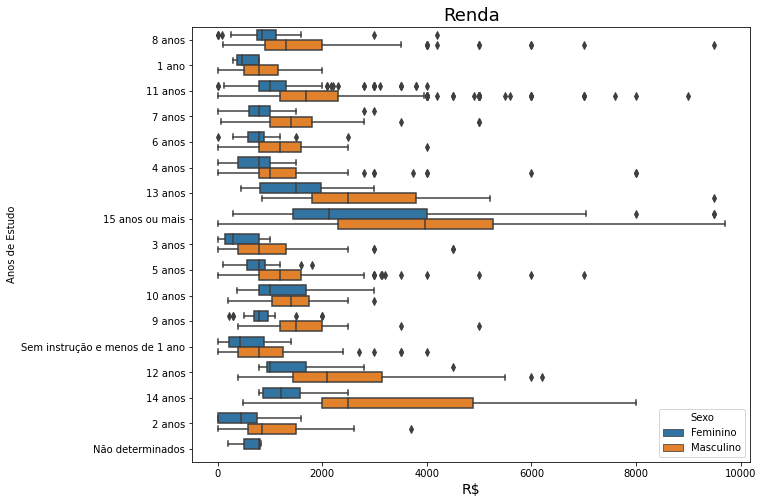

In [193]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 40'), orient = 'h')

ax.figure.set_size_inches(10, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

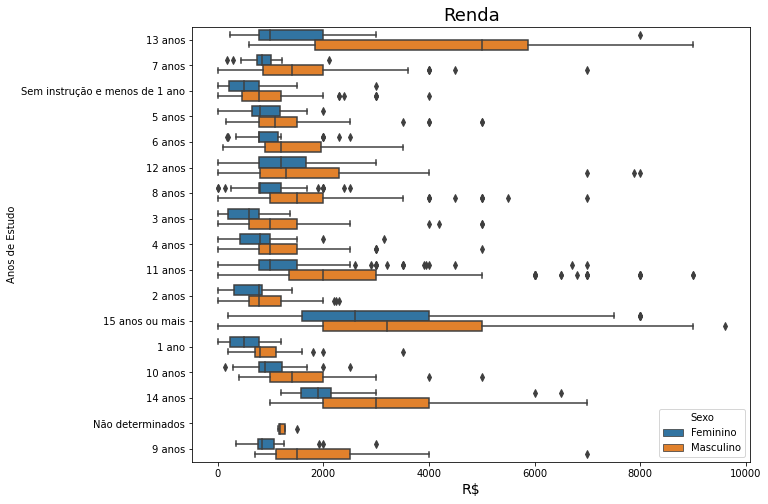

In [194]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')

ax.figure.set_size_inches(10, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

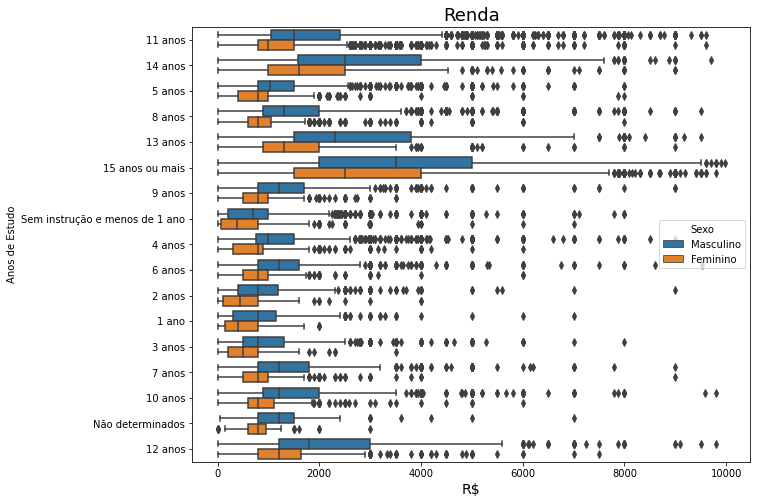

In [195]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(10, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

O box plot acima traz informações a respeito da dispersão, assimetria, comprimento da cauda e outliers dos dados analisados, nele é feita a separação das informações a partir de renda, sexo e anos de estudo sendo possível a percepção de que em termos de renda o sexo masculino (destacado na cor azul) geralmente possui um tamanho e dispersão maior dando a entender que o sexo masculino geralmente ganha salários maiores.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [196]:
dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

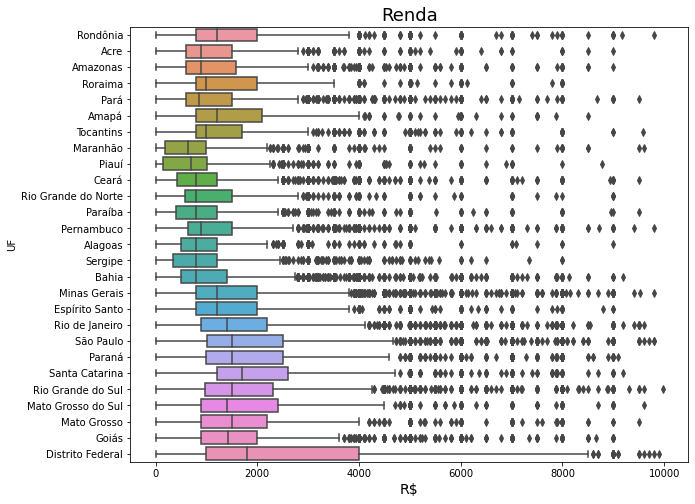

In [197]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(10, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Quando é feita a mediana, desvio padrão e valor máximo da variável renda segundo as unidades da federação é possível perceber que alguns estados possuem uma mediana e valor máximo a mais que outros analisados, dando a entender que naquele estado ocorre uma concentração maior de dinheiro ou que há mais pessoas que possuem grande capital acumulado, isso também é perceptível quando se analisa o gráfico box plot que nesse caso é uma boa representação da mediana, desvio padrão e valor máximo da variável UF.

# <font color=green> Parte 2 - Probabilidades, Amostragem e Estimações </font>

Um cliente nos encomendou um estudo para avaliar o **rendimento dos chefes de domicílio no Brasil**. Para isso precisamos realizar uma nova coleta de dados, isto é, uma nova pesquisa de campo. Após reunião com o cliente foi possível elencar o seguinte conjunto de informações:

> A. O resultado da pesquisa precisa estar pronto em **2 meses**;

> B. Teremos somente **R$\$$ 150.000,00** de recursos para realização da pesquisa de campo; e
    
> C. Seria interessante uma **margem de erro não superior a 10% em relação a média estimada**.

Em nossa experiência com estudos deste tipo, sabemos que o **custo médio por indivíduo entrevistado fica em torno de R$\$$ 100,00**. Com este conjunto de fatos avalie e obtenha o seguinte conjunto de informações para passar ao cliente:


> 1. Para obter uma estimativa para os parâmetros da população (renda dos chefes de domicílio no Brasil), realize uma amostragem aleatória simples em nosso conjunto de dados. Essa amostra deve conter 200 elementos (utilize random_state = 101 para garantir que o mesmo experimento posso ser realizado novamente). Obtenha a média e o desvio-padrão dessa amostra.
    
> 2. Para a **margem de erro** especificada pelo cliente obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança de 90%, 95% e 99%**.
    
> 3. Obtenha o **custo da pesquisa** para os três níveis de confiança.
    
> 4. Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.
    
> 5. Assumindo um **nível de confiança de 95%**, **quanto a pesquisa custaria ao cliente** caso fosse considerada uma **margem de erro de apenas 5%** em relação a média estimada?


## <font color='blue'>Solução do item 1</font>

### **Seleção de uma amostra aleatório simples**

### <font color='red'>Lembre-se de utilizar *random_state = 101*</font>

In [198]:
dados.shape[0]

76840

In [199]:
dados.Renda.mean()

2000.3831988547631

In [200]:
amostra = dados.sample(n = 200, random_state = 101)

In [201]:
amostra.shape[0]

200

In [202]:
amostra.Renda.mean()

1964.205

### **Dados do problema**

In [203]:
recursos = 150000
custo_entrevista = 100
media_amostra = amostra['Renda'].mean()
desvio_padrao_amostra = amostra['Renda'].std()

In [204]:
media_amostra

1964.205

## <font color='blue'>Solução do item 2</font>

### Obtenha a margem de erro

#### <font color='red'>Lembre-se que a margem de erro deve estar na mesma unidade da variável que está sendo estudada (R$)</font>

In [205]:
sigma = recursos
e = media_amostra*0.10

### Tamanho da amostra ($1 - \alpha = 90\%$)

In [206]:
significancia = 0.1
confianca = 1 - significancia

In [207]:
z = stats.norm.ppf(confianca + (significancia/2))

In [208]:
n = (z * (sigma / e)) ** 2
amostra_90 = int(n.round())
amostra_90

1577842

### Tamanho da amostra ($1 - \alpha = 95\%$)

In [209]:
significancia = 0.05
confianca = 1 - significancia

In [210]:
z = stats.norm.ppf(confianca + (significancia/2))

In [211]:
n = (z * (sigma / e)) ** 2
amostra_95 = int(n.round())
amostra_95

2240294

### Tamanho da amostra ($1 - \alpha = 99\%$)

In [212]:
significancia = 0.01
confianca = 1 - significancia

In [213]:
z = stats.norm.ppf(confianca + (significancia/2))

In [214]:
n = (z * (sigma / e)) ** 2
amostra_99 = int(n.round())
amostra_99

3869395

## <font color='blue'>Solução do item 3</font>

### Custo da pesquisa para o nível de confiança de 90%

### Custo da pesquisa para o nível de confiança de 95%

### Custo da pesquisa para o nível de confiança de 99%

## <font color='blue'>Solução do item 4</font>

## <font color='blue'>Solução do item 5</font>

# <font color=green> Parte 3 - Testes de Hipóteses </font>

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [215]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [216]:
amostra_rj = dados.query('UF == "Rio de Janeiro"').sample(n = 500, random_state = 101).Renda
amostra_sp = dados.query('UF == "São Paulo"').sample(n = 500, random_state = 101).Renda

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [217]:
# média
print(f'Média da amostra do Rio de Janeioro: {amostra_rj.mean():.2f}') 
print(f'Média da amostra de São Paulo: {amostra_sp.mean():.2f}') 

Média da amostra do Rio de Janeioro: 2240.52
Média da amostra de São Paulo: 2839.35


In [218]:
# desvio padrão
print(f'Desvio Padrão da amostra do Rio de Janeioro: {amostra_rj.std():.2f}') 
print(f'Desvio Padrão da amostra de São Paulo: {amostra_sp.std():.2f}') 

Desvio Padrão da amostra do Rio de Janeioro: 4643.84
Desvio Padrão da amostra de São Paulo: 3699.38


In [219]:
significancia = 0.05 
confianca = 1 - significancia
n_M = 500
n_H = 500
D_0 = 0
men_amostra_rj = amostra_rj.mean()
men_amostra_sp = amostra_sp.mean()
dp_amostra_rj = amostra_rj.std()
dp_amostra_sp = amostra_sp.std()

## Lembre-se...

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $\mu_1 \Rightarrow$ Média das rendas do estado do Rio de Janeiro
### $\mu_2 \Rightarrow$ Média das rendas do estado de São Paulo

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### **Passo 2** - escolha da distribuição amostral adequada

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### Podemos afirmar que a população se distribui aproximadamente como uma normal?
#### Resp.: Não

### O desvio padrão populacional é conhecido?
#### Resp.: Não

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [220]:
probabilidade = confianca
probabilidade

0.95

In [221]:
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

1.64

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [222]:
numerador = (men_amostra_rj - men_amostra_sp) - D_0
denominador = np.sqrt((dp_amostra_rj** 2 / n_H) + (dp_amostra_sp ** 2 / n_M))
z = numerador/denominador
z

-2.255318273608558

---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

In [223]:
z >= z_alpha

False

### <font color='red'>Critério do valor $p$</font>

### Utilize DescrStatsW

In [224]:
test_rj = DescrStatsW(amostra_rj)
test_sp = DescrStatsW(amostra_sp)

In [225]:
test_A = test_rj.get_compare(test_sp)

In [226]:
z, p_valor = test_A.ztest_ind(alternative='larger', value=0)
p_valor

0.9879433207843066

### Utilize CompareMeans

In [227]:
test_B = CompareMeans(test_rj, test_sp)
z, p_valor = test_B.ztest_ind(alternative='larger', value=0)
p_valor

0.9879433207843066

In [228]:
p_valor <= significancia

False

### <font color='green'>Conclusão: (Digite sua conclusão aqui)</font>

A partir da regra de rejeição: $$ p\_value <= \alpha$$
Aceitamos H0, isto é, concluímos que a média das rendas do do estado de Rio de Janeiro é menor que a média das rendas do estado de São Paulo. Confirmando a alegação de desigualdade de renda entre os estados.